                                     Data Science Exercise 2


1. Read xml and json data

1.1 Set base path
In local computer, create a folder, set this folder as the current working directory, copy data folder (145 data files) 
Python code in this folder.

In [1]:
import os
base_path=os.getcwd()
os.chdir(base_path)

1.2 Read xml data

In [2]:
import pandas as pd
import xml.etree.ElementTree as ET

In [3]:
tree = ET.parse(base_path+"/data/AviationData.xml")  #Read xml data
root = tree.getroot()                                # get root

# There are over 20 varaibles, here only ten were selected, which might be most important
columns = ["EventId",  "EventDate", "Location", "InjurySeverity","AircraftDamage", "PurposeOfFlight", "TotalFatalInjuries",
           "TotalSeriousInjuries",  "WeatherCondition", "BroadPhaseOfFlight"]

# Create an empty dataframe to store the data
df_xml = pd.DataFrame(columns = columns)

# Read node using for--loop. This will take a while
for node in root[0]: 
# extract data for each variable
    EventId = node.attrib.get("EventId")
    EventDate = node.attrib.get("EventDate")
    Location = node.attrib.get("Location")
    InjurySeverity = node.attrib.get("InjurySeverity")
    AircraftDamage = node.attrib.get("AircraftDamage")
    
    PurposeOfFlight = node.attrib.get("PurposeOfFlight")
    TotalFatalInjuries = node.attrib.get("TotalFatalInjuries")
    TotalSeriousInjuries = node.attrib.get("TotalSeriousInjuries")
    WeatherCondition = node.attrib.get("WeatherCondition")
    BroadPhaseOfFlight = node.attrib.get("BroadPhaseOfFlight")

    df_xml = df_xml.append(pd.Series([EventId, EventDate, Location, InjurySeverity,AircraftDamage, PurposeOfFlight,      
    TotalFatalInjuries,TotalSeriousInjuries,  WeatherCondition, BroadPhaseOfFlight], index = columns), ignore_index = True)
    
df_xml=df_xml.drop_duplicates('EventId')            # Remove duplicate records
df_xml['Date']=pd.to_datetime(df_xml['EventDate'])  # Change Date from string type to datetime format
df_xml['Year']=df_xml['Date'].dt.year               # Extract year from the date variable
df_xml['Month']=df_xml['Date'].dt.month             # Extract month from the date variable
df_xml['Day']=df_xml['Date'].dt.day                 # Extract day from the date variable

df_xml.to_pickle("df_xml")                          # Save xml dataframe as a pickle file

In [4]:
df_xml.head(5)                                      # show first five rows of the xml dataframe

,EventId,EventDate,Location,InjurySeverity,AircraftDamage,PurposeOfFlight,TotalFatalInjuries,TotalSeriousInjuries,WeatherCondition,BroadPhaseOfFlight,Date,Year,Month,Day
0,20150901X74304,09/01/2015,"Truckee, CA",,,,,,,,2015-09-01,2015.0,9.0,1.0
1,20150901X92332,08/31/2015,"Houston, TX",Non-Fatal,Substantial,Instructional,,,VMC,LANDING,2015-08-31,2015.0,8.0,31.0
2,20150902X61853,08/30/2015,"New Milford, CT",,,,,,,,2015-08-30,2015.0,8.0,30.0
3,20150901X02521,08/30/2015,"New Enterprise, PA",,,,,,,,2015-08-30,2015.0,8.0,30.0
4,20150831X61356,08/29/2015,"MIDLOTHIAN, TX",,,,,,,,2015-08-29,2015.0,8.0,29.0


1.3 Read json data (144 files)

In [5]:
files = os.listdir(base_path+"/data/")              # Get all file names in data folder
file_json=[x for x in files if 'json' in x]         # Create a list of json file names


In [6]:
columns_json = ["EventId",  "narrative", "probable_cause"]

df_json=pd.DataFrame(columns = columns_json)        # Create an empty dataframe to store json data
for i in list(range(len(file_json))):               # Create a for-loop to read each json file
    df1= pd.read_json(base_path+"/data/"+file_json[i])
    data =list(df1['data'])
    EventId= [item['EventId'] for item in data]
    Procause= [item['probable_cause'] for item in data]
    Narrative= [item['narrative'] for item in data]
    df2=pd.DataFrame({'EventId': EventId, 'narrative':Narrative, 'probable_cause':Procause})
    df_json=pd.concat([df_json,df2])

df_json=df_json.drop_duplicates('EventId')          # Remove duplicate records
df_json.to_pickle("df_json")                        # Save xml dataframe as a pickle file

df_xml_json=pd.merge(df_xml, df_json, how='inner', on='EventId')  # Merge xml dataframe and json dataframe

df_xml_json.to_pickle("df_xml_json")                #  Save merged dataframe as a pickle file     

In [7]:
df_xml_json.head(5)

,EventId,EventDate,Location,InjurySeverity,AircraftDamage,PurposeOfFlight,TotalFatalInjuries,TotalSeriousInjuries,WeatherCondition,BroadPhaseOfFlight,Date,Year,Month,Day,narrative,probable_cause
0,20150901X74304,09/01/2015,"Truckee, CA",,,,,,,,2015-09-01,2015.0,9.0,1.0,,
1,20150901X92332,08/31/2015,"Houston, TX",Non-Fatal,Substantial,Instructional,,,VMC,LANDING,2015-08-31,2015.0,8.0,31.0,"On August 31, 2015, about 1230 central dayligh...",
2,20150902X61853,08/30/2015,"New Milford, CT",,,,,,,,2015-08-30,2015.0,8.0,30.0,,
3,20150901X02521,08/30/2015,"New Enterprise, PA",,,,,,,,2015-08-30,2015.0,8.0,30.0,,
4,20150831X61356,08/29/2015,"MIDLOTHIAN, TX",,,,,,,,2015-08-29,2015.0,8.0,29.0,,



2. Natural language processing

2.1 Find the most frequent terms in the narrative text

In [8]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')              # Create a stopword list

df_xmljson =pd.read_pickle("df_xml_json")            # Read the merged dataframe

Word_freq =df_xmljson['narrative'].str.split(expand=True).stack().value_counts()  #Get word frequency
Word_freqlist = Word_freq.reset_index().values.tolist()                           # Change wrod frequency to a list

Filtered_words = [i for i in Word_freqlist if i[0].lower() not in stop_words]     # Remove stopword
print ('Top 10 most freqent words: ', Filtered_words[0:10])

Top 10 most freqent words:  [['pilot', 87998], ['airplane', 86401], ['accident', 83090], ['aircraft', 81368], ['data', 70419], ['used', 69708], ['NTSB', 69343], ['investigation', 69140], ['support', 68261], ['various', 68078]]


2.2 Find the change of word frequencies over time

In [9]:
Year =list(range(2005, 2015))
Top5_words =[]
for i in Year:
    df_year=df_xmljson[df_xmljson['Year']==i]
    Word_freq =df_year['narrative'].str.split(expand=True).stack().value_counts()
    Word_freqlist = Word_freq.reset_index().values.tolist()
    FilteredWords = [i[0] for i in Word_freqlist if i[0].lower() not in stop_words]
    Top5_words.append(FilteredWords[0:5])
Year_words =dict(zip(Year, Top5_words))

In [10]:
Year_words  # Top 5 most frequent words from 2005 to 2014. Most are same with slight changes.

{2005: ['airplane', 'pilot', 'accident', 'aircraft', 'engine'],
 2006: ['airplane', 'pilot', 'accident', 'aircraft', 'engine'],
 2007: ['airplane', 'pilot', 'accident', 'aircraft', 'engine'],
 2008: ['airplane', 'pilot', 'accident', 'aircraft', 'flight'],
 2009: ['airplane', 'pilot', 'accident', 'aircraft', 'engine'],
 2010: ['airplane', 'pilot', 'accident', 'engine', 'aircraft'],
 2011: ['airplane', 'pilot', 'accident', 'engine', 'data'],
 2012: ['airplane', 'pilot', 'accident', 'engine', 'flight'],
 2013: ['airplane', 'pilot', 'accident', 'engine', 'flight'],
 2014: ['airplane', 'pilot', 'flight', 'accident', 'engine']}

2.3 Topic modeling------ analysis of narrative text

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


df_narrative=df_xmljson.loc[:,['EventId','narrative' ]]
df_narrative =df_narrative[df_narrative['narrative' ]!=''] # drop empty row

cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(df_narrative['narrative'])

 2.3.1 Latent Dirichlet allocation (LDA)

In [12]:

LDA = LatentDirichletAllocation(n_components=4,random_state=42)
LDA.fit(dtm) #take a few minutes

Topic_narrative =[]
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')
    topic=[cv.get_feature_names()[i] for i in topic.argsort()[-10:]]
    Topic_narrative.append(topic)    

topic_results = LDA.transform(dtm)
df_narrative['Topic_narrative'] = topic_results.argmax(axis=1) # Combining with Original Data

df_topic_narrative=df_narrative.loc[:, ['EventId','Topic_narrative']]

df_xmljson_topic=df_xmljson.merge( df_topic_narrative, how='left', on='EventId') # Merge with Original Data


THE TOP 10 WORDS FOR TOPIC #0
['various', 'sources', 'report', 'traveled', 'used', 'investigation', 'accident', 'acft', 'aircraft', 'fuel']


THE TOP 10 WORDS FOR TOPIC #1
['ntsb', 'data', 'used', 'report', 'landing', 'accident', 'aircraft', 'runway', 'pilot', 'airplane']


THE TOP 10 WORDS FOR TOPIC #2
['weather', 'obtained', 'conditions', 'feet', 'time', 'accident', 'airport', 'airplane', 'pilot', 'flight']


THE TOP 10 WORDS FOR TOPIC #3
['power', 'landing', 'aircraft', 'flight', 'examination', 'accident', 'revealed', 'pilot', 'airplane', 'engine']




2.4 Topic modeling------ analysis of probably cause

In [13]:
df_cause=df_xmljson.loc[:,['EventId','probable_cause' ]]
df_cause =df_cause[df_cause['probable_cause']!=''] # drop empty row


cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(df_cause['probable_cause'])


LDA = LatentDirichletAllocation(n_components=4,random_state=42)
LDA.fit(dtm)

Topic_cause=[]
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')
    topic=[cv.get_feature_names()[i] for i in topic.argsort()[-10:]]
    Topic_cause.append(topic)
    
topic_results = LDA.transform(dtm)
df_cause['Topic_cause'] = topic_results.argmax(axis=1)

df_topic_cause=df_cause.loc[:, ['EventId','Topic_cause']]

df_xmljson_topic=df_xmljson_topic.merge( df_topic_cause, how='left', on='EventId')


df_xmljson_topic.to_pickle("df_xmljson_topic")  


THE TOP 10 WORDS FOR TOPIC #0
['clearance', 'engine', 'undetermined', 'landing', 'maintain', 'power', 'loss', 'failure', 'terrain', 'pilot']


THE TOP 10 WORDS FOR TOPIC #1
['resulted', 'factors', 'runway', 'accident', 'decision', 'inadequate', 'failure', 'fuel', 'flight', 'pilot']


THE TOP 10 WORDS FOR TOPIC #2
['accident', 'airplane', 'factor', 'resulted', 'directional', 'maintain', 'landing', 'control', 'failure', 'pilot']


THE TOP 10 WORDS FOR TOPIC #3
['improper', 'maintenance', 'gear', 'resulted', 'landing', 'fuel', 'power', 'loss', 'failure', 'engine']





3. Exploratory data analysis

In [14]:
df_aviation =pd.read_pickle('df_xmljson_topic')

Year_event =df_aviation['Year'].value_counts()
Month_event =df_aviation['Month'].value_counts()
Day_event =df_aviation['Day'].value_counts()

Location =df_aviation['Location'].value_counts()
InjurySeverity =df_aviation['InjurySeverity'].value_counts()
AircraftDamage =df_aviation['AircraftDamage'].value_counts()
PurposeOfFlight =df_aviation['PurposeOfFlight'].value_counts()

TotalFatalInjuries =df_aviation['TotalFatalInjuries'].value_counts()
TotalSeriousInjuries =df_aviation['TotalSeriousInjuries'].value_counts()
WeatherCondition =df_aviation['WeatherCondition'].value_counts()
BroadPhaseOfFlight =df_aviation['BroadPhaseOfFlight'].value_counts()
Topic_narrative =df_aviation['Topic_narrative'].value_counts()

Topic_cause =df_aviation['Topic_cause'].value_counts()

In [15]:
Year_event   # Print the number of event in each year

1982.0    3547
1983.0    3513
1984.0    3406
1985.0    3053
1986.0    2832
1987.0    2773
1988.0    2685
1989.0    2502
1990.0    2480
1991.0    2420
1992.0    2327
1993.0    2285
1995.0    2278
1994.0    2229
1998.0    2196
2000.0    2183
1999.0    2173
1996.0    2150
1997.0    2121
2003.0    2063
2001.0    2032
2002.0    2001
2005.0    2001
2007.0    1984
2004.0    1932
2008.0    1893
2011.0    1844
2012.0    1831
2006.0    1825
2009.0    1785
2010.0    1783
2013.0    1531
2014.0    1499
2015.0     967
1981.0       1
1979.0       1
1977.0       1
1974.0       1
1962.0       1
1948.0       1
Name: Year, dtype: int64

In [16]:
Month_event  # Print the number of event in each year

7.0     9190
8.0     8623
6.0     8229
5.0     7371
9.0     7006
4.0     6337
10.0    5805
3.0     5790
11.0    4651
2.0     4525
12.0    4305
1.0     4298
Name: Month, dtype: int64

In [17]:
Location  # Print the number of event in each year

ANCHORAGE, AK         361
MIAMI, FL             182
ALBUQUERQUE, NM       159
CHICAGO, IL           155
HOUSTON, TX           147
                     ... 
Altoona, WI             1
BROTHERS, OR            1
GRAND JUNCTION, TN      1
ANACAPA ISLAND, CA      1
ARDARA, PA              1
Name: Location, Length: 24702, dtype: int64

In [18]:
InjurySeverity # Print the number of event in each injury severity catagory

Non-Fatal     57871
Fatal(1)       7499
Fatal(2)       4398
Incident       2892
Fatal(3)       1355
              ...  
Fatal(256)        1
Fatal(143)        1
Fatal(26)         1
Fatal(55)         1
Fatal(156)        1
Name: InjurySeverity, Length: 120, dtype: int64

In [19]:
PurposeOfFlight # Print the number of event in each Purpose of Flight catagory

Personal                     42910
Instructional                 9098
Unknown                       6560
Aerial Application            4259
Business                      3784
                              3469
Positioning                   1470
Other Work Use                1078
Ferry                          762
Public Use                     697
Aerial Observation             638
Executive/Corporate            497
Flight Test                    292
Air Race/Show                  119
Skydiving                      104
Public Aircraft - Federal       83
Banner Tow                      77
External Load                   75
Public Aircraft - State         49
Public Aircraft - Local         48
Glider Tow                      37
Fire Fighting                   19
Air Drop                         8
Name: PurposeOfFlight, dtype: int64


4. Data visualization

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

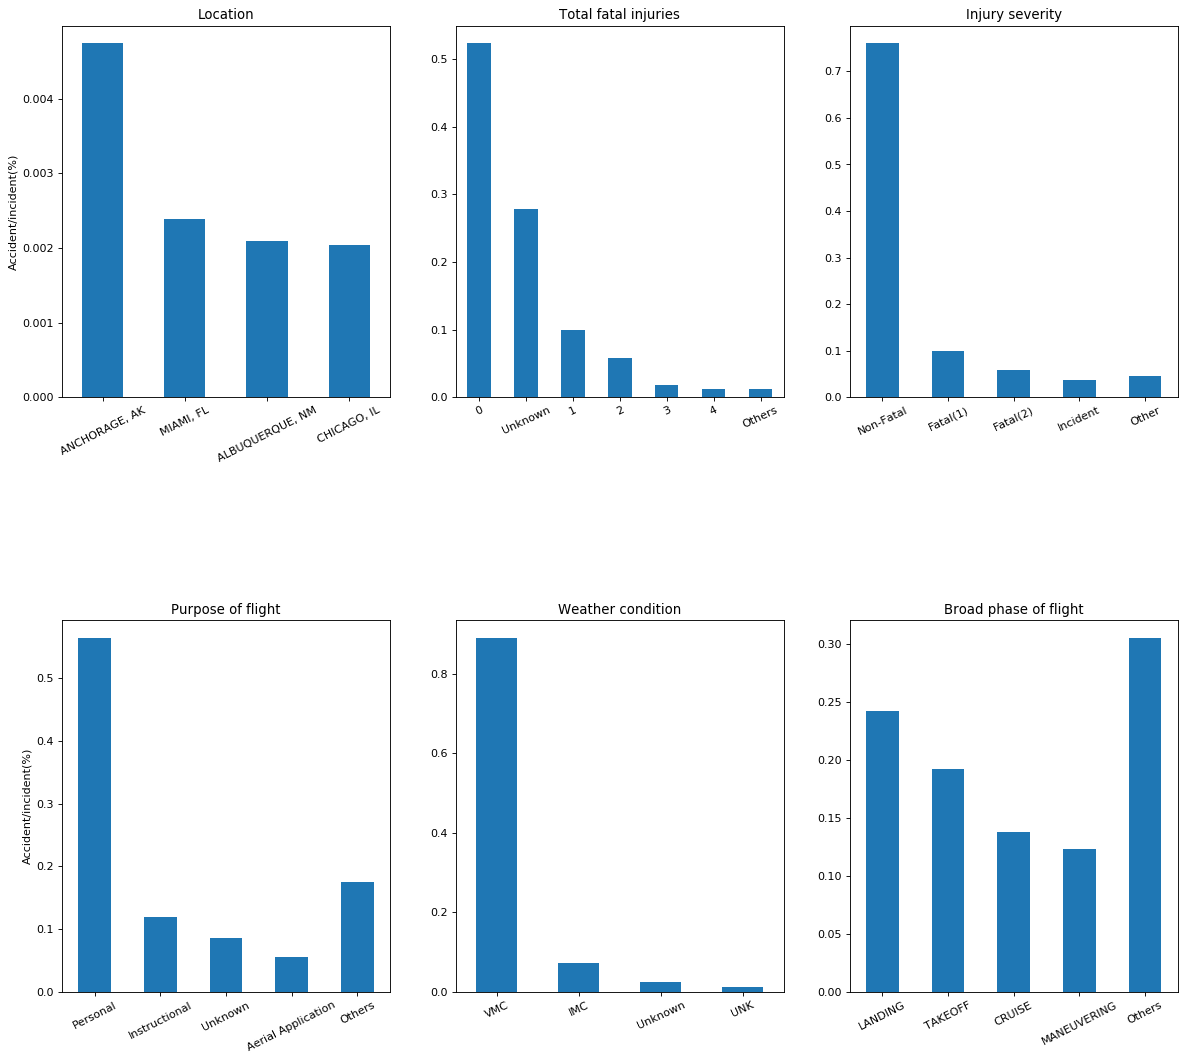

In [21]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2,3,1)  # Plot the percentage of 4 locations where accident were most occurred
prob = df_aviation['Location'].value_counts(normalize=True)
threshold = 0.002
mask = prob > threshold
prob = prob.loc[mask]
prob.plot(kind='bar')
plt.xticks(rotation=27)
plt.title('Location')
plt.ylabel('Accident/incident(%)')

plt.subplot(2,3,2) #Plot the percentage of top 7 categories of total fatal injuries
prob = df_aviation['TotalFatalInjuries'].value_counts(normalize=True)
threshold = 0.01
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['Others'] = tail_prob
prob1=prob[2:7]
prob1['0']=prob[0]
prob1['Unknown']=prob[1]
prob=prob1.sort_values(ascending=False)
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.title('Total fatal injuries')


plt.subplot(2,3,3) #Plot the percentage of top 5 categories of injury severity
prob = df_aviation['InjurySeverity'].value_counts(normalize=True)
threshold = 0.03
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['Other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.title('Injury severity')



plt.subplot(2,3,4) #Plot the percentage of top 5 categories of purpose of flight
prob = df_aviation['PurposeOfFlight'].value_counts(normalize=True)
threshold = 0.05
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['Others'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=27)
plt.title('Purpose of flight')
plt.ylabel('Accident/incident(%)')


plt.subplot(2,3,5) #Plot the percentage of top 3 categories of weather condition
prob = df_aviation['WeatherCondition'].value_counts(normalize=True)
prob1=prob[0:2]
prob1['Unknown']=prob[2]
prob1['UNK']=prob[3]
prob=prob1
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.title('Weather condition')

plt.subplot(2,3,6) #Plot the percentage of top 5 categories of broad phage of flight
prob = df_aviation['BroadPhaseOfFlight'].value_counts(normalize=True)
threshold = 0.1
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['Others'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=27)
plt.title('Broad phase of flight')
plt.subplots_adjust(hspace=0.6)
plt.show()

